# TSF Summer Internship
## TASK - 7: Stock Market Prediction using Numerical and Textual Analysis
**Objective:** Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines <br>
**Author:** Dhruv Shah <br>
**Predicted and Analyzed Stock:** SENSEX (S&P BSE SENSEX)

**Importing basic Libraries**

In [1]:
import time
import datetime
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore') 

**Reading the news headlines dataset from the local environment**

In [3]:
df_news = pd.read_csv('india-news-headlines.csv', header = 0)

In [4]:
df_news.head(5)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


**Reading the Stocks History dataset from the local environment**

In [5]:
df_stocks = pd.read_csv('BSESN.csv')

In [6]:
df_stocks.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
1,1,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2,2,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
3,3,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
4,4,2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0


**Working with the dataset**

In [7]:
df_stocks = df_stocks.drop('Unnamed: 0', axis = 1)

In [8]:
df_stocks.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
1,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
3,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
4,2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0


In [9]:
print(df_stocks.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


**Identigying NaN entries and dropping it for stocks history data**

In [10]:
df_stocks.isna().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [11]:
df_stocks = df_stocks.dropna()
df_stocks = df_stocks.reset_index(drop = True)

**Droping duplicate values for stocks history data**

In [12]:
df_stocks = df_stocks.drop_duplicates()
df_stocks.shape

(5031, 7)

In [13]:
df_stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
1,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
3,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
4,2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0
...,...,...,...,...,...,...,...
5026,2021-06-10,52143.898438,52346.351563,51957.921875,52300.468750,52300.468750,8600.0
5027,2021-06-11,52477.191406,52641.531250,52388.949219,52474.761719,52474.761719,8500.0
5028,2021-06-14,52492.339844,52590.921875,51936.308594,52551.531250,52551.531250,9900.0
5029,2021-06-15,52751.828125,52869.511719,52671.289063,52773.050781,52773.050781,16300.0


**Converting the date of given dataset type to date-time type**

In [14]:
import math
df_stocks['Date'] = pd.to_datetime(df_stocks['Date']).dt.normalize()
df_stocks.set_index('Date', inplace = True)
df_stocks = df_stocks.sort_index(ascending=True, axis=0)
df_stocks.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0
2001-01-10,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0.0
2001-01-11,4066.129883,4077.540039,4006.540039,4027.129883,4027.129883,0.0
2001-01-12,4059.409912,4082.770020,4018.280029,4036.580078,4036.580078,0.0
2001-01-15,4074.320068,4080.139893,4018.239990,4046.760010,4046.760010,0.0


In [15]:
df_stocks.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,52121.578125,52273.230469,51942.199219,52232.429688,52232.429688,15000.0
2021-06-04,52367.519531,52389.019531,51952.699219,52100.050781,52100.050781,16700.0
2021-06-07,52231.378906,52378.691406,52054.761719,52328.511719,52328.511719,19800.0
2021-06-08,52428.718750,52432.429688,52135.039063,52275.570313,52275.570313,12300.0
2021-06-09,52401.410156,52446.921875,51717.070313,51941.640625,51941.640625,15200.0
2021-06-10,52143.898438,52346.351563,51957.921875,52300.468750,52300.468750,8600.0
2021-06-11,52477.191406,52641.531250,52388.949219,52474.761719,52474.761719,8500.0
2021-06-14,52492.339844,52590.921875,51936.308594,52551.531250,52551.531250,9900.0
2021-06-15,52751.828125,52869.511719,52671.289063,52773.050781,52773.050781,16300.0


**Checking for NaN values for news headlines dataset and droping duplicate values**

In [16]:
df_news.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [17]:
df_news.drop_duplicates()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [18]:
df_news['publish_date'] = df_news['publish_date'].astype(str)
df_news['publish_date'] = df_news['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
df_news['publish_date'] = pd.to_datetime(df_news['publish_date']).dt.normalize()

In [19]:
df_news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


**Setting Date as the index and joining all the headlines of a particulare date togather**

In [20]:
df_news = df_news.filter(['publish_date', 'headline_text'])
df_news = df_news.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()
df_news.set_index('publish_date', inplace = True)
df_news.sort_index(ascending = True, axis = 0)
df_news.head(5)

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...


In [21]:
df_news.shape

(7262, 1)

**Installing necessary libraries for the analysis**

In [22]:
! pip install pmdarima

In [23]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

import os
import nltk
import itertools
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
import unicodedata

import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from pmdarima import auto_arima

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DHRUV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DHRUV\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Functions for returning subjectivity and polarity of the dataset**

In [25]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [26]:
df_news['Subjectivity'] = df_news['headline_text'].apply(getSubjectivity)
df_news['Polarity'] = df_news['headline_text'].apply(getPolarity)
df_news.head()

,headline_text,Subjectivity,Polarity
publish_date,,,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.254902,0.113725
2001-01-03,"Powerless north India gropes in the dark,Think...",0.458333,0.108333
2001-01-04,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492
2001-01-05,Light combat craft takes India into club class...,0.458870,0.252557
2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485


<AxesSubplot:>

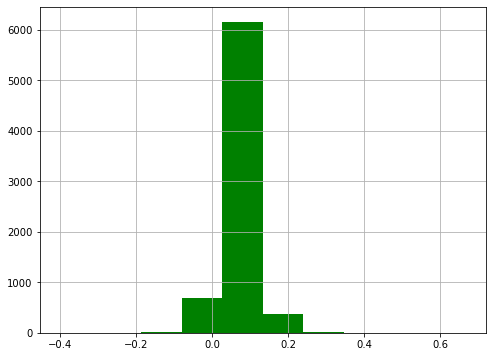

In [27]:
plt.figure(figsize = (8, 6))
df_news['Polarity'].hist(color = 'green')

<AxesSubplot:>

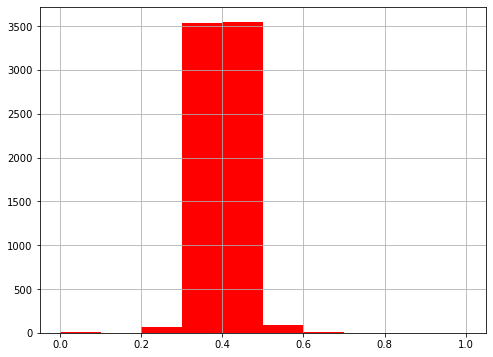

In [28]:
plt.figure(figsize = (8, 6))
df_news['Subjectivity'].hist(color = 'red')

**Initializing the new columns of sentiments to the dataframe**

In [29]:
df_news['compound'] = ''
df_news['negative'] = ''
df_news['neutral'] = ''
df_news['positive'] = ''
df_news.head()

,headline_text,Subjectivity,Polarity,compound,negative,neutral,positive
publish_date,,,,,,,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.254902,0.113725,,,,
2001-01-03,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,,,,
2001-01-04,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,,,,
2001-01-05,Light combat craft takes India into club class...,0.458870,0.252557,,,,
2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,,,,


**Sentiment Analyzer method**

In [31]:
SIA = SentimentIntensityAnalyzer()
df_news['compound'] = df_news['headline_text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df_news['negative'] = df_news['headline_text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df_news['neutral'] = df_news['headline_text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df_news['positive'] = df_news['headline_text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

In [32]:
df_news.head(10)

,headline_text,Subjectivity,Polarity,compound,negative,neutral,positive
publish_date,,,,,,,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.254902,0.113725,-0.9426,0.108,0.820,0.072
2001-01-03,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,Light combat craft takes India into club class...,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,0.4404,0.118,0.709,0.172
2001-01-07,"Muslim body rules out talks on Ayodhya,Bajrang...",0.343813,-0.037689,-0.9876,0.096,0.894,0.010
2001-01-08,"Sangh Parivar; Babri panel up the ante,Frontru...",0.308747,-0.017149,-0.9898,0.123,0.858,0.018
2001-01-09,Financier Bharat Shah held for alleged links w...,0.517625,-0.059579,-0.9901,0.120,0.836,0.044
2001-01-10,"Fend for yourselves; Pande tells doctors,Burea...",0.000000,0.000000,-0.5719,0.227,0.773,0.000


In [33]:
df_news.tail(10)

,headline_text,Subjectivity,Polarity,compound,negative,neutral,positive
publish_date,,,,,,,
2020-12-22,Addite and Mohit Malik: We are looking forward...,0.377538,0.029462,-0.9999,0.158,0.743,0.099
2020-12-23,"Sawmill in Makarpura GIDC gutted; none hurt,Ci...",0.391126,0.081656,-0.9996,0.120,0.800,0.080
2020-12-24,How to set the mood for sex during cold winter...,0.394847,0.049329,-0.9971,0.082,0.854,0.064
2020-12-25,merry christmas quotes messages wishes 10 reli...,0.421468,0.074054,0.9063,0.097,0.801,0.101
2020-12-26,Numerology Readings 26 December 2020: Predicti...,0.389380,0.063003,-0.9996,0.133,0.764,0.102
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.406559,0.045097,-0.9994,0.113,0.812,0.075
2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.415279,0.080771,-0.9997,0.126,0.790,0.084
2020-12-29,Man recovers charred remains of 'thief' from h...,0.412775,0.066816,-0.9998,0.136,0.774,0.090
2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.433598,0.058847,-0.9998,0.126,0.797,0.077


**Concating both the datasets according to the date**

In [34]:
df = pd.concat([df_stocks, df_news], axis = 1)

In [35]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,compound,negative,neutral,positive
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,Status quo will not be disturbed at Ayodhya; s...,0.254902,0.113725,-0.9426,0.108,0.820,0.072
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,Light combat craft takes India into club class...,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-06,NaN,NaN,NaN,NaN,NaN,NaN,Light combat craft takes India into club class...,0.439394,0.248485,0.4404,0.118,0.709,0.172


**Checking for NaN values and dropping the founded NaN values row**

In [36]:
df.isna().any()

Open             True
High             True
Low              True
Close            True
Adj Close        True
Volume           True
headline_text    True
Subjectivity     True
Polarity         True
compound         True
negative         True
neutral          True
positive         True
dtype: bool

In [37]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,compound,negative,neutral,positive
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,Light combat craft takes India into club class...,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",0.308747,-0.017149,-0.9898,0.123,0.858,0.018
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,Financier Bharat Shah held for alleged links w...,0.517625,-0.059579,-0.9901,0.120,0.836,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539063,46973.539063,13700.0,How to set the mood for sex during cold winter...,0.394847,0.049329,-0.9971,0.082,0.854,0.064
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600.0,Horoscope Today; 28 December 2020: Check astro...,0.415279,0.080771,-0.9997,0.126,0.790,0.084
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0,Man recovers charred remains of 'thief' from h...,0.412775,0.066816,-0.9998,0.136,0.774,0.090
2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0,Numerology Readings 30 December 2020: Predicti...,0.433598,0.058847,-0.9998,0.126,0.797,0.077


**Finding the means and standard deviations of the openning and closing price of the data**

In [38]:
mean_open = df['Open'].rolling(window = 50).mean()
mean_close = df['Close'].rolling(window = 50).mean()
sd_open = df['Open'].rolling(window = 50).std()
sd_close = df['Close'].rolling(window = 50).std()

**Visualizing the means and standard deviations in graphical format**

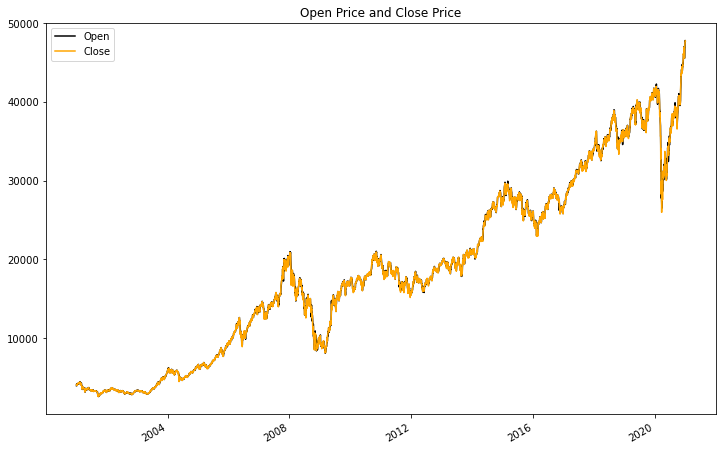

In [39]:
plt.figure(figsize = (12, 8))
df['Open'].plot(color = 'black', label = 'Open')
df['Close'].plot(color = 'orange', label = 'Close')
plt.title("Open Price and Close Price")
plt.legend()

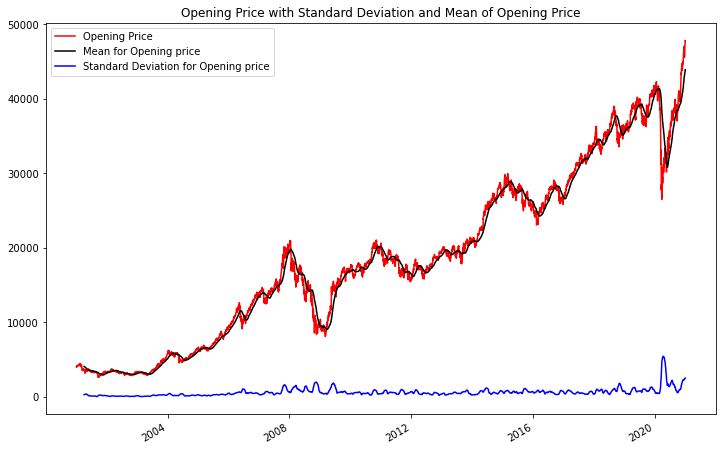

In [40]:
plt.figure(figsize = (12, 8))
df['Open'].plot(color = 'red', label = 'Opening Price')
mean_open.plot(color = 'black', label = 'Mean for Opening price')
sd_open.plot(color = 'blue', label = 'Standard Deviation for Opening price')
plt.title("Opening Price with Standard Deviation and Mean of Opening Price")
plt.legend()

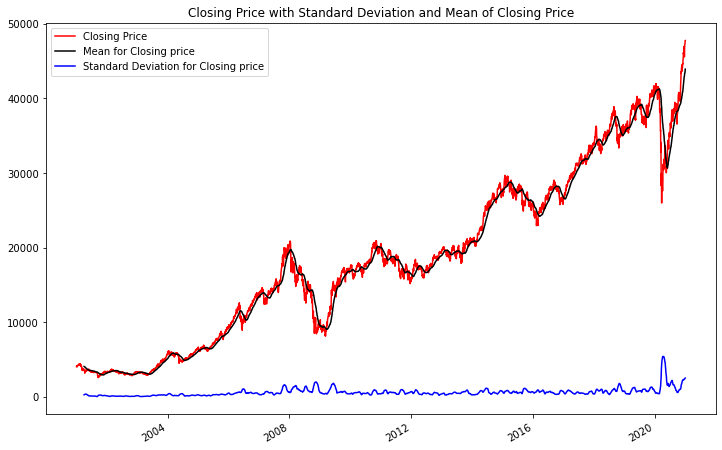

In [41]:
plt.figure(figsize = (12, 8))
df['Close'].plot(color = 'red', label = 'Closing Price')
mean_close.plot(color = 'black', label = 'Mean for Closing price')
sd_close.plot(color = 'blue', label = 'Standard Deviation for Closing price')
plt.title("Closing Price with Standard Deviation and Mean of Closing Price")
plt.legend()

2001-01-03         NaN
2001-01-04    0.013633
2001-01-05    0.016611
2001-01-08   -0.015130
2001-01-09    0.001184
                ...   
2020-12-24    0.011398
2020-12-28    0.008094
2020-12-29    0.005476
2020-12-30    0.002796
2020-12-31    0.000107
Name: Close, Length: 4892, dtype: float64


Text(0.5, 1.0, 'Daily Returns')

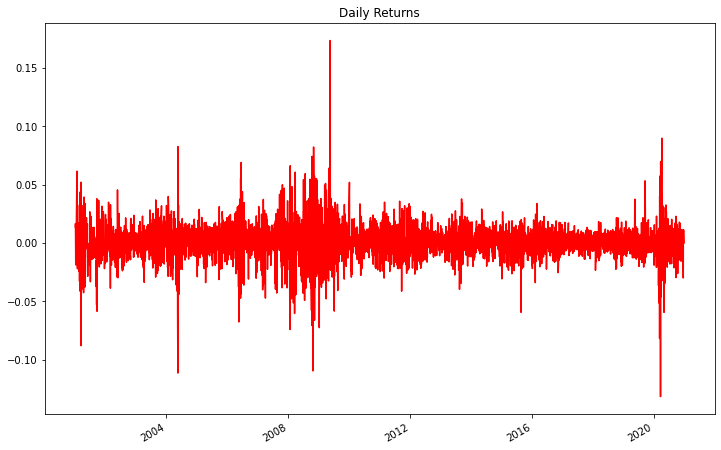

In [42]:
#Daily Returns 
daily_returns = df['Close']/df['Close'].shift(1) - 1
print(daily_returns)
plt.figure(figsize = (12, 8))
daily_returns.plot(label = 'Daily Returns', color = 'red')
plt.title("Daily Returns")

2001-01-03         NaN
2001-01-04         NaN
2001-01-05         NaN
2001-01-08         NaN
2001-01-09         NaN
                ...   
2020-12-24    0.015355
2020-12-28    0.014728
2020-12-29    0.015413
2020-12-30    0.016727
2020-12-31    0.048237
Name: Close, Length: 4892, dtype: float64


Text(0.5, 1.0, 'Weekly Returns')

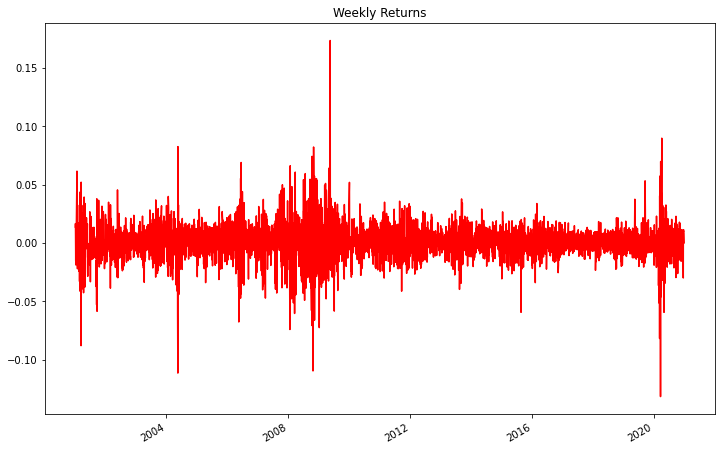

In [43]:
#Daily Returns 
weekly_returns = df['Close']/df['Close'].shift(7) - 1
print(weekly_returns)
plt.figure(figsize = (12, 8))
daily_returns.plot(label = 'Weekly Returns', color = 'red')
plt.title("Weekly Returns")

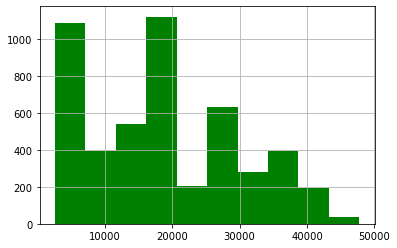

In [44]:
df['Close'].hist(color = 'green')
plt.show()

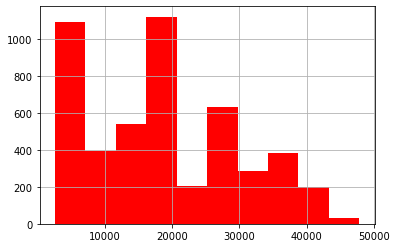

In [45]:
df['Open'].hist(color = 'red')
plt.show()

In [46]:
df.shape

(4892, 13)

In [47]:
train_x = df[:2940]
test_x = df[2941:]

**Checking the timeseries whether it is stationary or not using Dickey Fuller test**

In [48]:
def stationary_test(series):
    mean = series.rolling(20).mean()
    std = series.rolling(20).mean()
    
    plt.figure(figsize = (12, 8))
    plt.plot(series, color = 'red', label = 'Origingal Time Series')
    plt.plot(mean, color = 'black', label = 'Rolling Mean')
    plt.plot(std, color = 'blue', label = 'Standard Deviation')
    plt.legend()
    plt.title('Original Series, Rolling Mean and Standard Deviation')
    plt.show(block = False)
    print('Dickey Fuller Test')
    result = adfuller(series, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")

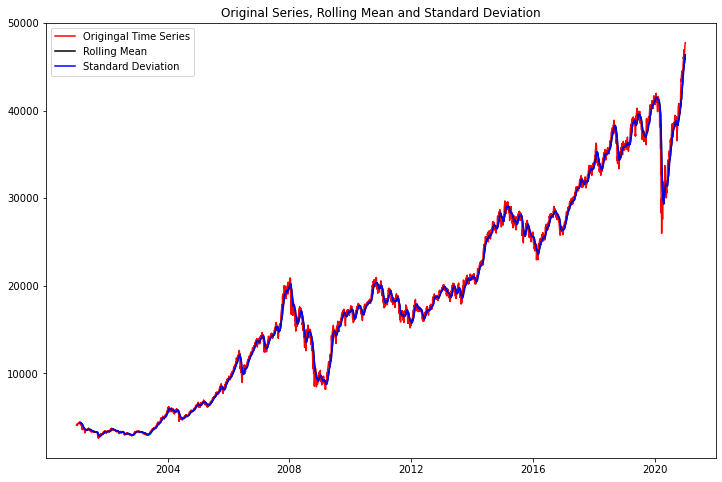

Dickey Fuller Test
ADF Test Statistic : 0.4500652948704747
p-value : 0.9832736890644272
#Lags Used : 28
Number of Observations Used : 4863
Weak evidence against null hypothesis, time series is non-stationary 


In [49]:
stationary_test(df['Close'])

**Checking the Dickey Fuller test for log series**

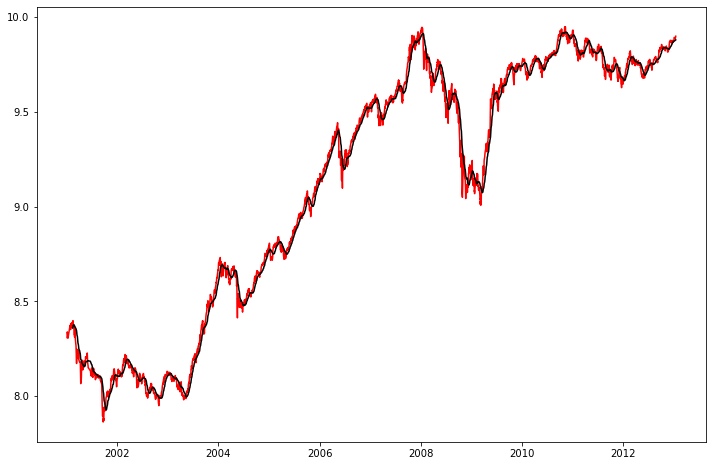

In [50]:
train_x_log = np.log(train_x['Close'])
test_x_log = np.log(test_x['Close'])
mean_log = train_x_log.rolling(20).mean()
plt.figure(figsize = (12, 8))
plt.plot(train_x_log, color = 'red')
plt.plot(mean_log, color = 'black')

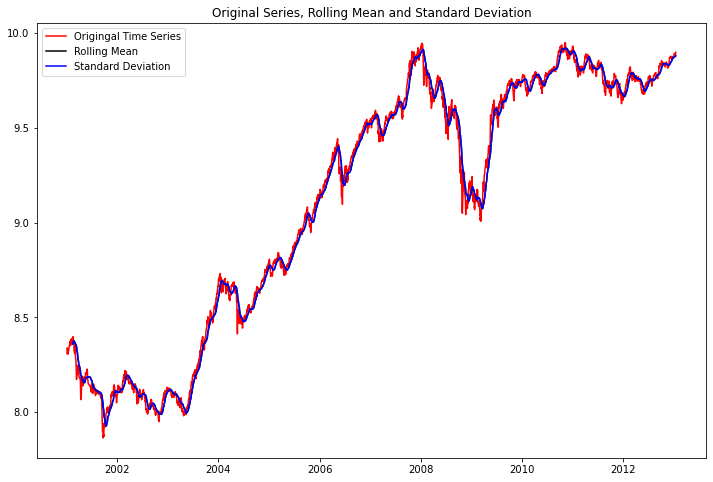

Dickey Fuller Test
ADF Test Statistic : -0.6896062710792165
p-value : 0.8494234102969707
#Lags Used : 2
Number of Observations Used : 2937
Weak evidence against null hypothesis, time series is non-stationary 


In [51]:
stationary_test(train_x_log)

**Checking the Dickey Fuller test for the difference of Log series and Log Mean**

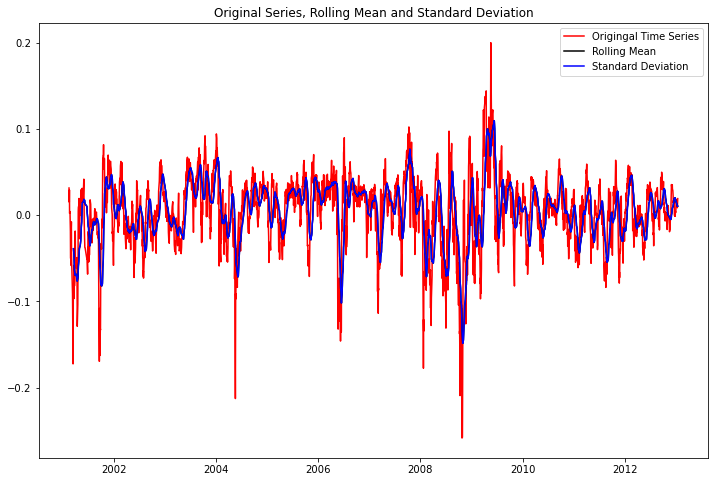

Dickey Fuller Test
ADF Test Statistic : -11.32198509715737
p-value : 1.168055830533656e-20
#Lags Used : 1
Number of Observations Used : 2919
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [52]:
train_x_log_diff = train_x_log - mean_log
train_x_log_diff.dropna(inplace = True)
stationary_test(train_x_log_diff)

**Using Auto-Arima model for prediction on the log data**

In [53]:
model = auto_arima(train_x_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_x_log)
pred = model.predict(n_periods = len(test_x))
pred = pd.DataFrame(pred,index = test_x_log.index,columns=['Predictions'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15888.184, Time=4.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15870.078, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15885.214, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15886.998, Time=2.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15868.823, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15890.039, Time=3.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15890.527, Time=1.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-15890.776, Time=1.99 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-15888.940, Time=2.06 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-15888.943, Time=2.35 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-15886.775, Time=2.62 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-15889.427, Time=0.48 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 25.069 seconds


**Visualizing the graph of actual price and predictions**

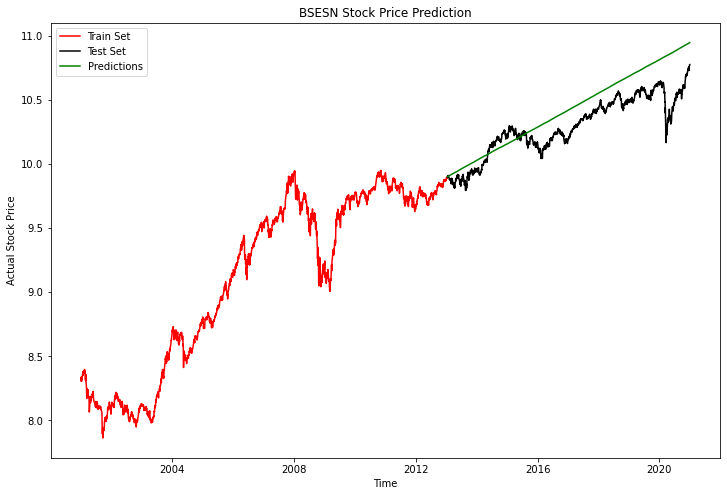

In [54]:
plt.figure(figsize = (12,8))
plt.plot(train_x_log, color = 'red', label='Train Set')
plt.plot(test_x_log, color = 'black', label='Test Set')
plt.plot(pred, color = 'green', label='Predictions')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend()

**Root Mean Square error for the model**

In [55]:
from sklearn.metrics import mean_squared_error
error_rms = np.sqrt(mean_squared_error(test_x_log, pred))
print('RMSE: ', error_rms)

RMSE:  0.18235685338401564


In [56]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,compound,negative,neutral,positive
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,Light combat craft takes India into club class...,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",0.308747,-0.017149,-0.9898,0.123,0.858,0.018
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,Financier Bharat Shah held for alleged links w...,0.517625,-0.059579,-0.9901,0.120,0.836,0.044


In [58]:
df_close = df[['Close','Subjectivity', 'Polarity', 'compound', 'negative', 'neutral' ,'positive']]
df_close.head()

,Close,Subjectivity,Polarity,compound,negative,neutral,positive
2001-01-03,4060.020020,0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4115.370117,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4183.729980,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-08,4120.430176,0.308747,-0.017149,-0.9898,0.123,0.858,0.018
2001-01-09,4125.310059,0.517625,-0.059579,-0.9901,0.120,0.836,0.044


**Scaling the inputs for the model**

In [59]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_close_sc = pd.DataFrame(sc.fit_transform(df_close))
df_close_sc.columns = df_close.columns
df_close_sc.index = df_close.index
df_close_sc.head()

,Close,Subjectivity,Polarity,compound,negative,neutral,positive
2001-01-03,0.032334,0.458333,0.539216,0.81610,0.189189,0.817,0.161184
2001-01-04,0.033559,0.473506,0.567637,0.22660,0.186937,0.844,0.120066
2001-01-05,0.035073,0.458870,0.708890,0.99460,0.231982,0.740,0.258224
2001-01-08,0.033672,0.308747,0.391590,0.00510,0.277027,0.858,0.029605
2001-01-09,0.033780,0.517625,0.341672,0.00495,0.270270,0.836,0.072368


**Defining the independent variables and dependent variable for the model**

In [60]:
x = df_close_sc.drop('Close', axis = 1)
y = df_close_sc['Close']
x.head()

,Subjectivity,Polarity,compound,negative,neutral,positive
2001-01-03,0.458333,0.539216,0.81610,0.189189,0.817,0.161184
2001-01-04,0.473506,0.567637,0.22660,0.186937,0.844,0.120066
2001-01-05,0.458870,0.708890,0.99460,0.231982,0.740,0.258224
2001-01-08,0.308747,0.391590,0.00510,0.277027,0.858,0.029605
2001-01-09,0.517625,0.341672,0.00495,0.270270,0.836,0.072368


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

**I have used Light GBM Model and XG Boost model for the predictions** <br> **Splitting the data into 80% train set and 20% test set**

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
x_train.shape

(3913, 6)

In [73]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor()

In [74]:
pred = lgb.predict(x_test)
print(mean_squared_error(pred, y_test))

0.02352631461679232


In [75]:
print(df_close_sc['Close'].head(5))
print(y_test)

2001-01-03    0.032334
2001-01-04    0.033559
2001-01-05    0.035073
2001-01-08    0.033672
2001-01-09    0.033780
Name: Close, dtype: float64
2004-02-23    0.068612
2014-07-22    0.518827
2006-01-06    0.155924
2006-08-04    0.183082
2019-05-06    0.797326
                ...   
2012-05-23    0.295628
2002-12-02    0.014844
2005-11-02    0.121207
2019-10-29    0.824601
2020-02-03    0.825497
Name: Close, Length: 979, dtype: float64


In [76]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
pred = xgb.predict(x_test)
print(mean_squared_error(pred, y_test))

0.02433029072776425


In [78]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,compound,negative,neutral,positive
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,Light combat craft takes India into club class...,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",0.308747,-0.017149,-0.9898,0.123,0.858,0.018
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,Financier Bharat Shah held for alleged links w...,0.517625,-0.059579,-0.9901,0.120,0.836,0.044
2001-01-10,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0.0,"Fend for yourselves; Pande tells doctors,Burea...",0.000000,0.000000,-0.5719,0.227,0.773,0.000
2001-01-23,4277.830078,4321.750000,4272.870117,4296.689941,4296.689941,0.0,"Sonia takes on the Hindutva brigade,Congress h...",0.330492,0.037429,0.9295,0.033,0.885,0.082
2001-01-24,4320.509766,4339.410156,4295.709961,4326.419922,4326.419922,0.0,"Govt extends J&K ceasefire by a month,Peace hi...",0.244444,0.100000,-0.9039,0.096,0.864,0.040
2001-01-25,4327.839844,4341.330078,4273.700195,4330.220215,4330.220215,0.0,"Big bath passes without a hitch,Security bando...",0.450126,0.063394,-0.9807,0.131,0.793,0.077
2001-01-29,4158.859863,4262.759766,4158.859863,4234.569824,4234.569824,0.0,"More tremors forecast for the next 48 hours,Th...",0.251605,0.191914,0.9708,0.054,0.812,0.134


**Sacing the data to the local environment**

In [79]:
df.to_csv('Stocks_News_details.csv')

In [127]:
df = pd.read_csv('Stocks_News_details.csv')

In [128]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,compound,negative,neutral,positive
0,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,0.6322,0.084,0.817,0.098
1,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,Light combat craft takes India into club class...,0.458870,0.252557,0.9892,0.103,0.740,0.157
3,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",0.308747,-0.017149,-0.9898,0.123,0.858,0.018
4,2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,Financier Bharat Shah held for alleged links w...,0.517625,-0.059579,-0.9901,0.120,0.836,0.044


**Dropping the headline column as it is not necessary for further analysis**

In [129]:
df.drop(['headline_text'], inplace = True, axis = 1)

**Renaming the unnamed column to date, checking for NaN values and removing it if present**

In [130]:
df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df.set_index('Date', inplace = True)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,compound,negative,neutral,positive
Date,,,,,,,,,,,,
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0.308747,-0.017149,-0.9898,0.123,0.858,0.018
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,0.517625,-0.059579,-0.9901,0.120,0.836,0.044
2001-01-10,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0.0,0.000000,0.000000,-0.5719,0.227,0.773,0.000
2001-01-23,4277.830078,4321.750000,4272.870117,4296.689941,4296.689941,0.0,0.330492,0.037429,0.9295,0.033,0.885,0.082
2001-01-24,4320.509766,4339.410156,4295.709961,4326.419922,4326.419922,0.0,0.244444,0.100000,-0.9039,0.096,0.864,0.040
2001-01-25,4327.839844,4341.330078,4273.700195,4330.220215,4330.220215,0.0,0.450126,0.063394,-0.9807,0.131,0.793,0.077


In [131]:
df.shape

(4892, 12)

In [132]:
df.isna().any()

Open            False
High            False
Low             False
Close           False
Adj Close       False
Volume          False
Subjectivity    False
Polarity        False
compound        False
negative        False
neutral         False
positive        False
dtype: bool

**Visualizing the given data**

In [133]:
df.describe(include = 'all')

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,compound,negative,neutral,positive
count,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4.892000e+03,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000
mean,18709.157627,18821.864805,18560.092777,18688.759191,18688.759191,8.072563e+04,0.399355,0.070408,-0.874760,0.126772,0.786559,0.086677
std,11249.991314,11289.217709,11180.899989,11232.915867,11232.915867,1.070076e+06,0.041587,0.041364,0.446873,0.024140,0.033043,0.020892
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00,0.000000,-0.350000,-1.000000,0.000000,0.000000,0.000000
25%,8941.352295,9040.012207,8801.094971,8930.730225,8930.730225,9.400000e+03,0.379270,0.047899,-0.999800,0.113000,0.766000,0.076000
50%,17650.980469,17770.674804,17501.464844,17620.399414,17620.399414,1.400000e+04,0.399030,0.069186,-0.999200,0.128000,0.783000,0.086000
75%,27320.277344,27448.867676,27159.526856,27292.834961,27292.834961,2.080000e+04,0.419351,0.091384,-0.994700,0.142000,0.804000,0.097000
max,47789.031250,47896.968750,47602.121094,47751.328125,47751.328125,3.181510e+07,1.000000,0.500000,1.000000,0.444000,1.000000,0.608000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4892 entries, 2001-01-03 to 2020-12-31
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4892 non-null   float64
 1   High          4892 non-null   float64
 2   Low           4892 non-null   float64
 3   Close         4892 non-null   float64
 4   Adj Close     4892 non-null   float64
 5   Volume        4892 non-null   float64
 6   Subjectivity  4892 non-null   float64
 7   Polarity      4892 non-null   float64
 8   compound      4892 non-null   float64
 9   negative      4892 non-null   float64
 10  neutral       4892 non-null   float64
 11  positive      4892 non-null   float64
dtypes: float64(12)
memory usage: 496.8+ KB


**Finding the 7-day rolling mean for the data**

In [135]:
df.rolling(7).mean().head(15)

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,compound,negative,neutral,positive
Date,,,,,,,,,,,,
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-23,4140.542899,4184.972831,4101.904227,4135.598598,4135.598598,0.0,0.363939,0.064869,-0.078243,0.110429,0.821857,0.067429
2001-01-24,4189.532854,4223.794294,4147.351353,4173.655727,4173.655727,0.0,0.333383,0.063679,-0.297686,0.112143,0.828571,0.059143
2001-01-25,4210.514230,4246.702846,4170.801409,4204.348598,4204.348598,0.0,0.330043,0.053808,-0.359671,0.119000,0.821286,0.059714


**Finding the correlation among the data and visualizing using the heatmap**

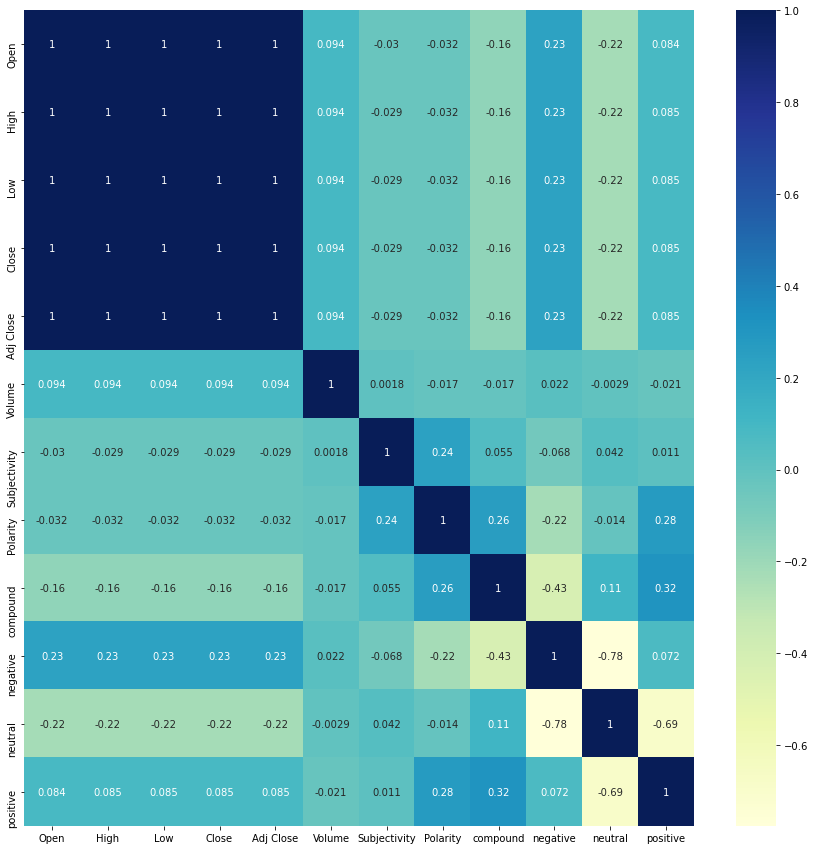

In [136]:
fig, ax = plt.subplots(figsize=(15, 15)) 
heat_map = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

**Manually splitting the data**

In [137]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(df)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(df)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 3912
Number of records in Test Data: 980


In [138]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,compound,negative,neutral,positive
Date,,,,,,,,,,,,
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0.308747,-0.017149,-0.9898,0.123,0.858,0.018
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,0.517625,-0.059579,-0.9901,0.120,0.836,0.044


In [139]:
steps_to_predict = 1

# capturing data to be used for each column
open_price = df.iloc[start:total_data,0] 
high = df.iloc[start:total_data,1] 
low = df.iloc[start:total_data,2] 
close_price = df.iloc[start:total_data,3] 
adj_close_price = df.iloc[start:total_data,4] 
volume = df.iloc[start:total_data,5] 
subjectivity = df.iloc[start:total_data,6]
polarity = df.iloc[start:total_data,7]
compound = df.iloc[start:total_data,8]
negative = df.iloc[start:total_data,9]
neutral = df.iloc[start:total_data,10]
positive = df.iloc[start:total_data,11] 

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2001-01-04     4115.370117
2001-01-05     4183.729980
2001-01-08     4120.430176
2001-01-09     4125.310059
2001-01-10     4047.639893
                  ...     
2020-12-24    46973.539063
2020-12-28    47353.750000
2020-12-29    47613.078125
2020-12-30    47746.218750
2020-12-31    47751.328125
Name: Close, Length: 4891, dtype: float64

**Shifting the closed price and compound and using them for predictions of closed price**

In [140]:
shifted_close_price = close_price.shift(-1)
shifted_compound = compound.shift(-1)
df['Shifted Closed Price'] = shifted_close_price
df['Shifted Compound'] = shifted_compound
df.head()

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,compound,negative,neutral,positive,Shifted Closed Price,Shifted Compound
Date,,,,,,,,,,,,,,
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0.458333,0.108333,0.6322,0.084,0.817,0.098,NaN,NaN
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0.473506,0.132492,-0.5468,0.083,0.844,0.073,4183.729980,0.9892
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0.458870,0.252557,0.9892,0.103,0.740,0.157,4120.430176,-0.9898
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0.308747,-0.017149,-0.9898,0.123,0.858,0.018,4125.310059,-0.9901
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,0.517625,-0.059579,-0.9901,0.120,0.836,0.044,4047.639893,-0.5719


**Dropping NaN values present in the data**

In [141]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,compound,negative,neutral,positive,Shifted Closed Price,Shifted Compound
Date,,,,,,,,,,,,,,
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0.473506,0.132492,-0.5468,0.083,0.844,0.073,4183.729980,0.9892
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0.458870,0.252557,0.9892,0.103,0.740,0.157,4120.430176,-0.9898
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0.308747,-0.017149,-0.9898,0.123,0.858,0.018,4125.310059,-0.9901
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,0.517625,-0.059579,-0.9901,0.120,0.836,0.044,4047.639893,-0.5719
2001-01-10,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0.0,0.000000,0.000000,-0.5719,0.227,0.773,0.000,4296.689941,0.9295


**Defining X and Y for the predicitons**

In [142]:
y = df['Shifted Closed Price']
y

Date
2001-01-04     4183.729980
2001-01-05     4120.430176
2001-01-08     4125.310059
2001-01-09     4047.639893
2001-01-10     4296.689941
                  ...     
2020-12-23    46973.539063
2020-12-24    47353.750000
2020-12-28    47613.078125
2020-12-29    47746.218750
2020-12-30    47751.328125
Name: Shifted Closed Price, Length: 4890, dtype: float64

In [167]:
cols = ['Open', 'High', 'Low', 'Shifted Compound', 'Close', 'compound', 'Volume']
x = df[cols]
x.head()

,Open,High,Low,Shifted Compound,Close,compound,Volume
Date,,,,,,,
2001-01-04,4180.970215,4180.970215,4109.549805,0.9892,4115.370117,-0.5468,0.0
2001-01-05,4116.339844,4195.009766,4115.350098,-0.9898,4183.729980,0.9892,0.0
2001-01-08,4164.759766,4206.720215,4101.529785,-0.9901,4120.430176,-0.9898,0.0
2001-01-09,4114.740234,4166.839844,4101.009766,-0.5719,4125.310059,-0.9901,0.0
2001-01-10,4151.580078,4155.859863,4035.439941,0.9295,4047.639893,-0.5719,0.0


In [168]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

**Pre-processing the data i.e scaling the data to be between (-1, 1)**

In [169]:
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.93096396, -0.93359019, -0.93233057, ..., -0.93287349,
         -0.5468    , -1.        ],
        [-0.93382579, -0.93296794, -0.93207144, ..., -0.92984511,
          0.9892    , -1.        ],
        [-0.93168176, -0.93244892, -0.93268887, ..., -0.93264933,
         -0.9898    , -1.        ],
        ...,
        [ 0.97186267,  0.98222136,  0.99045457, ...,  0.98261339,
         -0.9997    , -0.99939651],
        [ 0.98572369,  0.99586481,  1.        , ...,  0.99410179,
         -0.9998    , -0.99919535],
        [ 1.        ,  1.        ,  0.99984189, ...,  1.        ,
         -0.9998    , -0.99901933]]),
 array([[-0.92985305],
        [-0.93265695],
        [-0.93244079],
        ...,
        [ 0.99387613],
        [ 0.99977368],
        [ 1.        ]]))

In [170]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (3912, 7) and y: (3912, 1)
Number of rows and columns in the Test set X: (977, 7) and y: (977, 1)


In [171]:
X_train = X_train.reshape(X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (3912, 7, 1)
Shape of Test set X: (977, 7, 1)


**Building the LSTM model 100 neurons and 5 layers**

In [172]:
np.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 7, 100)            40800     
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 7, 100)            80400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 7, 100)            80400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)              

**Compiling the model and fitting the train data to the model**

In [173]:
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs= 15, batch_size=8, verbose=1)

Epoch 1/15
392/392 [==============================] - 15s 38ms/step - loss: 0.0132 - val_loss: 0.0022
Epoch 2/15
392/392 [==============================] - 12s 30ms/step - loss: 0.0021 - val_loss: 0.0206
Epoch 3/15
392/392 [==============================] - 11s 28ms/step - loss: 0.0016 - val_loss: 0.0123
Epoch 4/15
392/392 [==============================] - 11s 28ms/step - loss: 0.0014 - val_loss: 0.0148
Epoch 5/15
392/392 [==============================] - 11s 28ms/step - loss: 0.0012 - val_loss: 0.0216
Epoch 6/15
392/392 [==============================] - 11s 29ms/step - loss: 0.0012 - val_loss: 0.0100
Epoch 7/15
392/392 [==============================] - 12s 30ms/step - loss: 0.0010 - val_loss: 0.0086
Epoch 8/15
392/392 [==============================] - 11s 27ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 9/15
392/392 [==============================] - 11s 28ms/step - loss: 9.8878e-04 - val_loss: 0.0100
Epoch 10/15
392/392 [==============================] - 11s 29ms/step - loss: 8

**Predicting the Closed Price**

In [174]:
pred = model.predict(X_test) 

# unscaling the predictions
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

# printing the predictions
print('Predictions:')
pred[0:5]

Predictions:


array([[-0.06935669],
       [-0.06417453],
       [-0.05947474],
       [-0.05424538],
       [-0.0578443 ]], dtype=float32)

**Evaluating the model**

In [175]:
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

977/977 [==============================] - 5s 5ms/step - loss: 0.1699
Train Loss = 0.0047
Test Loss = 0.1699


**Root Mean Square Error for the model**

In [176]:
rmse = metrics.mean_squared_error(y_test, pred)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 0.4122


**Visualizing the predicted output and the original output**

In [177]:
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

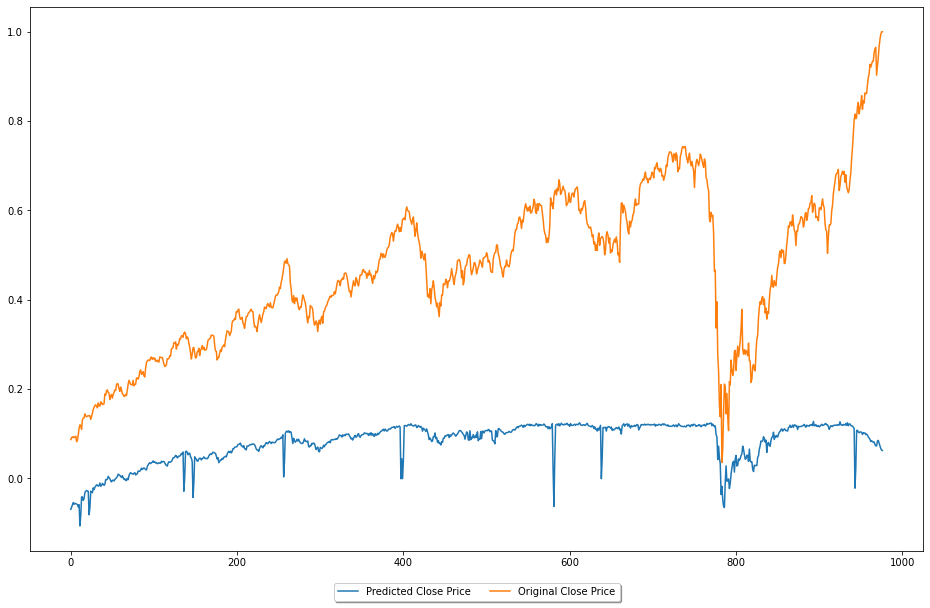

In [178]:
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(pred, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Original Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()